In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fuel=pd.read_csv('data/measurements.csv')
fuel

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
fuel.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [4]:
# checking if excel has the same data
fuel2=pd.read_excel('data/measurements2.xlsx')
#fuel2

In [5]:
fuel2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [6]:
fuel.compare(fuel2)

distance       consume       temp_inside       refill liters      
        self other    self other        self other          self other
0         28  28.0       5   5.0        21,5  21.5            45  45.0
1         12  12.0     4,2   4.2        21,5  21.5           NaN   NaN
2       11,2  11.2     5,5   5.5        21,5  21.5           NaN   NaN
3       12,9  12.9     3,9   3.9        21,5  21.5           NaN   NaN
4       18,5  18.5     4,5   4.5        21,5  21.5           NaN   NaN
..       ...   ...     ...   ...         ...   ...           ...   ...
383       16  16.0     3,7   3.7        24,5  24.5           NaN   NaN
384     16,1  16.1     4,3   4.3          25  25.0           NaN   NaN
385       16  16.0     3,8   3.8          25  25.0           NaN   NaN
386     15,4  15.4     4,6   4.6          25  25.0           NaN   NaN
387     14,7  14.7       5   5.0          25  25.0           NaN   NaN

[388 rows x 8 columns]

In [7]:
#need to clean 'fuel' dataframe as well as change some dtypes before comparing

In [8]:
#change the column names to follow 'snake_case'
def snake_case(df):
    df.columns=[a.lower().replace(' ','_') for a in df.columns]
    return df

fuel=snake_case(fuel)
fuel2=snake_case(fuel2)

In [9]:
def clean(df):
    cols=['distance','consume','temp_inside','refill_liters']
    for col in cols:
        df[col]= df[col].str.replace(',','.').astype(float)
    return df
fuel=clean(fuel)

In [10]:
# now we can compare the two dataframes

diff=fuel.compare(fuel2)

if diff.empty:
    print("The two DataFrames are equal")
else:
    print("The two DataFrames are not equal")
    print(diff)

The two DataFrames are equal


In [11]:
# since they have the same data, we will continue with analysis on the csv file

## EDA

- Units found from the dataset source

distance- km \
consume- ltrs per 100 km \
speed- km per hr \
temperature- °C \
specials- if it was raining, if the air condition was on, if it was sunny enough that the car felt warm

https://www.kaggle.com/datasets/anderas/car-consume/data

In [12]:
fuel

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [13]:
#checking for nans
fuel.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [14]:
# we can do some analysis before cleaning the nans

### Which fuel was refilled the most?

In [15]:
#total liters of each fuel refilled
refill_ltrs=fuel.groupby('refill_gas').agg({'refill_liters':sum})

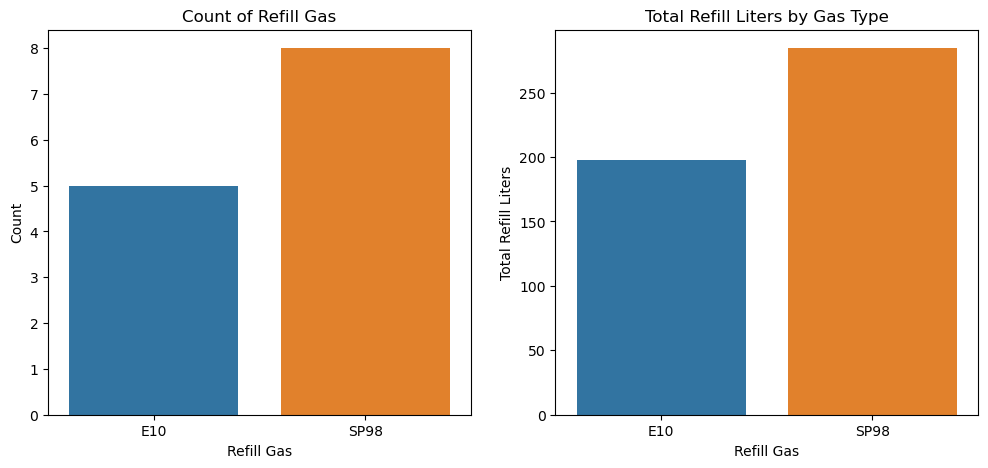

In [16]:
# shows the count for each fuel refill
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(12, 5))
sns.countplot(x='refill_gas', data=fuel, ax=ax1)
ax1.set_xlabel('Refill Gas')
ax1.set_ylabel('Count')
ax1.set_title('Count of Refill Gas')

sns.barplot(x=refill_ltrs.index,y='refill_liters',data=refill_ltrs, ax=ax2)
ax2.set_xlabel('Refill Gas')
ax2.set_ylabel('Total Refill Liters')
ax2.set_title('Total Refill Liters by Gas Type')
plt.show()

SP98 was refilled more than E10 for driving the vehicle. \
Also the quantity refilled for SP98 was more than E10.

#### But why?

In [17]:
dist=fuel.groupby('gas_type').agg({'distance':sum})
dist

,distance
gas_type,
E10,3375.4
SP98,4249.9


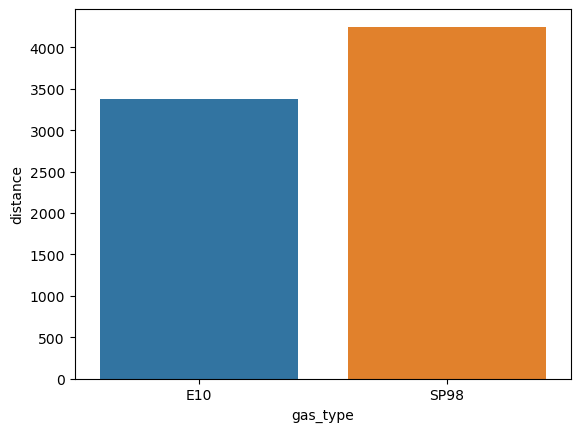

In [18]:
# distance travelled by each fuel type
sns.barplot(x=dist.index,y='distance',data=dist)
plt.show()

From the above graph, we can see that the total distance travelled with SP98 is way more than E10 which could be the reason for more refills.

### Dealing with nans

In [19]:
# dropping columns with high nan values as they will not provide any useful information

fuel=fuel.drop(['specials','refill_liters','refill_gas'],axis=1)

In [20]:
fuel['temp_inside'].mean()

21.929521276595743

In [21]:
#filling nans in 'temp_inside' with 0 doesnt make sense as it will impact the mean, so we will fill it with the mean

In [22]:
fuel['temp_inside']=fuel['temp_inside'].fillna(fuel['temp_inside'].mean())

In [23]:
fuel.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

In [24]:
# using the distance and speed, we can calculate the time take for the drive (speed=distance/time)

fuel['time']=fuel['distance']/fuel['speed'] #this time is in hours
fuel['time']=round(fuel['time']*60,2) #time in mins

In [25]:
fuel

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,time
0,28.0,5.0,26,21.5,12,E10,0,0,0,64.62
1,12.0,4.2,30,21.5,13,E10,0,0,0,24.00
2,11.2,5.5,38,21.5,15,E10,0,0,0,17.68
3,12.9,3.9,36,21.5,14,E10,0,0,0,21.50
4,18.5,4.5,46,21.5,15,E10,0,0,0,24.13
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,24.62
384,16.1,4.3,38,25.0,31,SP98,1,0,0,25.42
385,16.0,3.8,45,25.0,19,SP98,0,0,0,21.33
386,15.4,4.6,42,25.0,31,SP98,1,0,0,22.00


In [26]:
# saving the clean file
fuel.to_csv('data/cleaned_data.csv',index=False)

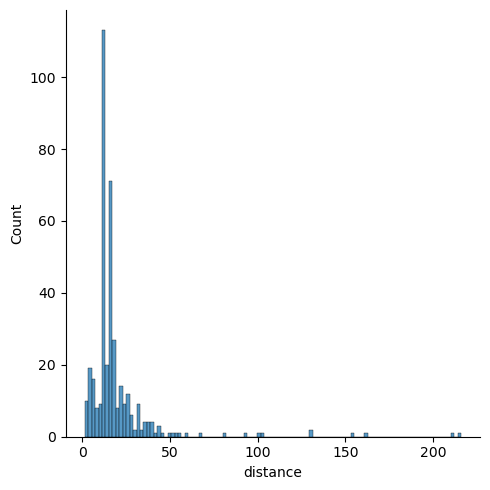

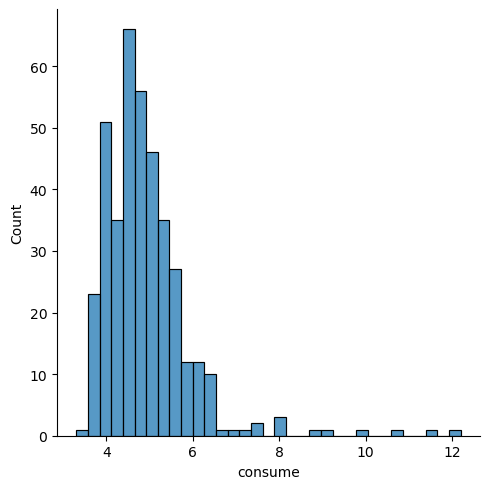

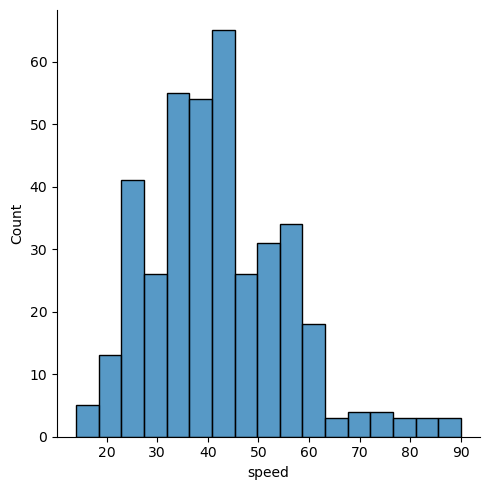

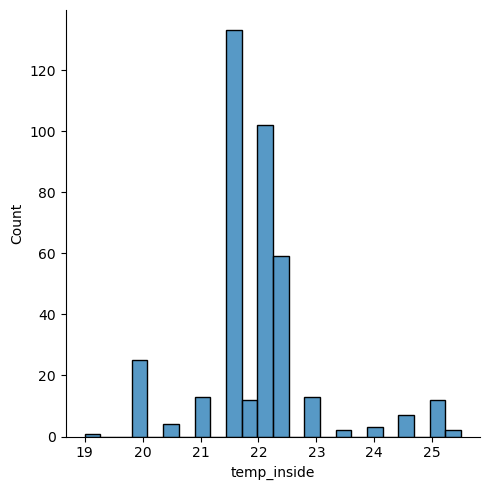

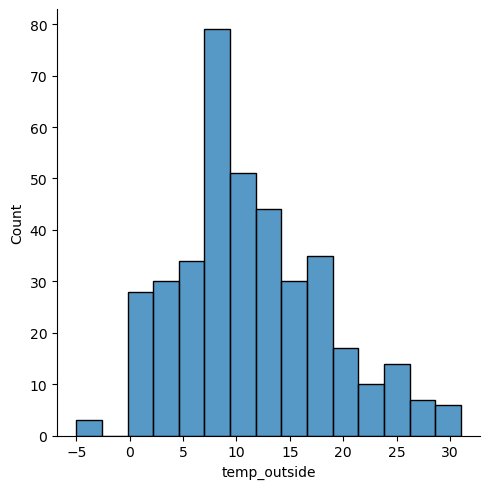

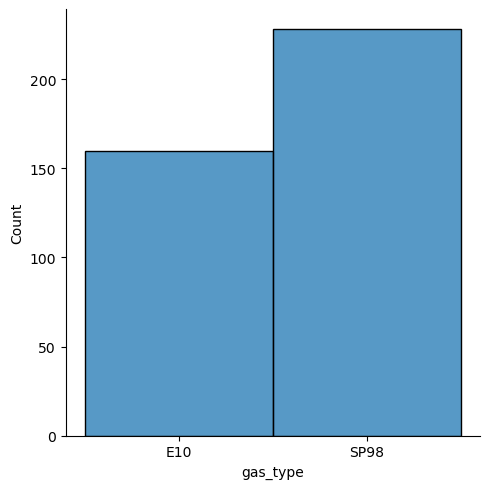

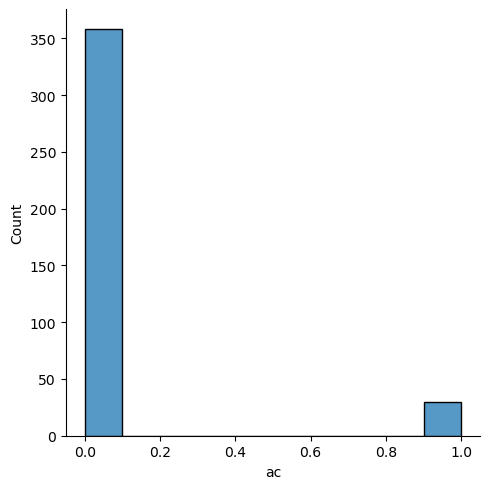

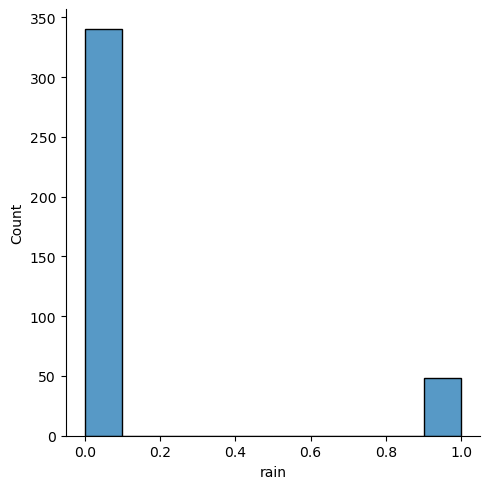

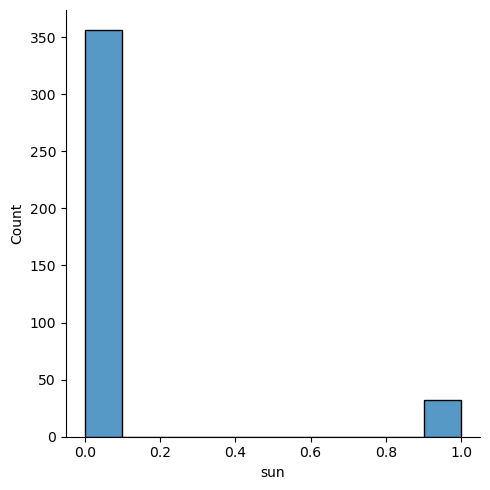

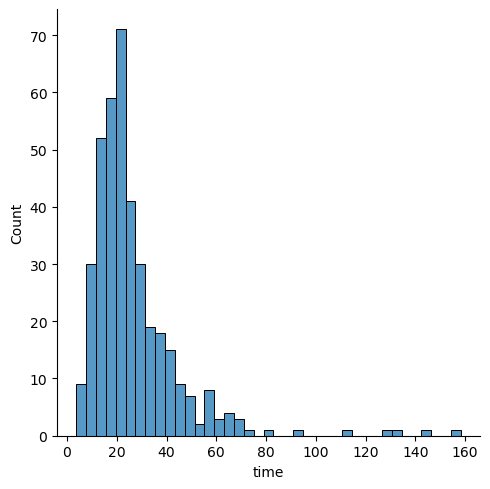

In [27]:
# lets see the distribution of all columns
for col in fuel.columns: 
    sns.displot(x=fuel[col])
    plt.show()

Parameters like distance, consumption and time are skewed towards the right which makes sense as there are less occurences in day to day life to make longer trips. Above graphs are distributions considering all fuels.

### Comparing features by fuel type

In [28]:
fuel['gas_type'].value_counts()

# there are only two fuel types used for all trips, so we can separate them and see some plots

SP98    228
E10     160
Name: gas_type, dtype: int64

In [29]:
fuel

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,time
0,28.0,5.0,26,21.5,12,E10,0,0,0,64.62
1,12.0,4.2,30,21.5,13,E10,0,0,0,24.00
2,11.2,5.5,38,21.5,15,E10,0,0,0,17.68
3,12.9,3.9,36,21.5,14,E10,0,0,0,21.50
4,18.5,4.5,46,21.5,15,E10,0,0,0,24.13
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,24.62
384,16.1,4.3,38,25.0,31,SP98,1,0,0,25.42
385,16.0,3.8,45,25.0,19,SP98,0,0,0,21.33
386,15.4,4.6,42,25.0,31,SP98,1,0,0,22.00


In [30]:
e10=fuel[fuel['gas_type']=='E10'].reset_index(drop=True).drop('gas_type',axis=1)
sp98= fuel[fuel['gas_type']=='SP98'].reset_index(drop=True).drop('gas_type',axis=1)

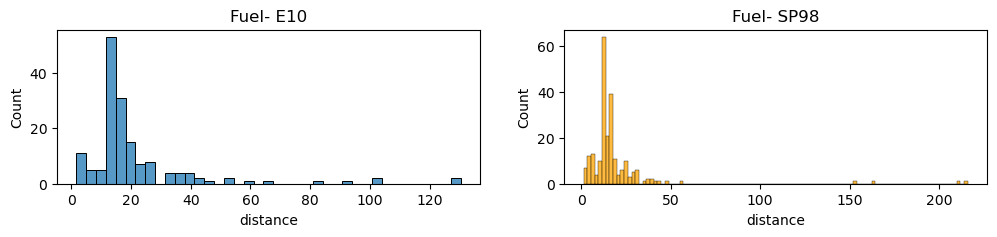

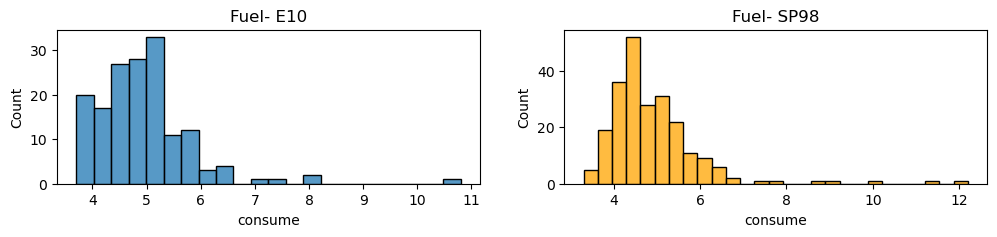

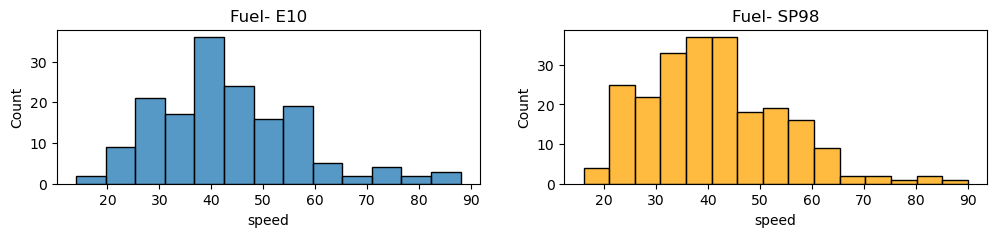

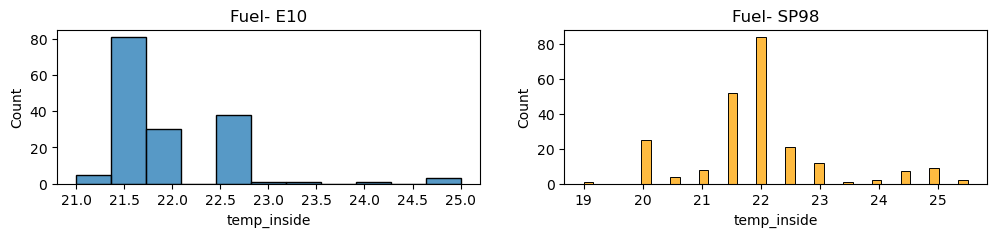

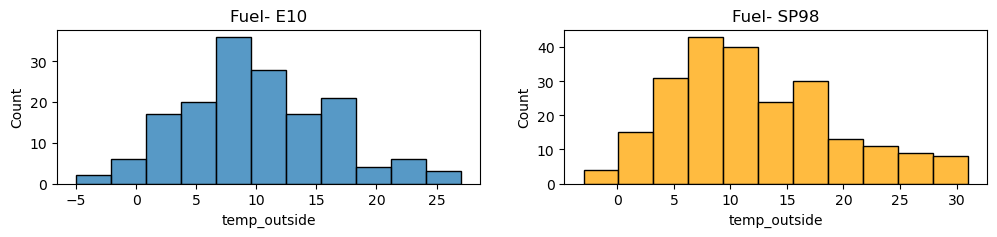

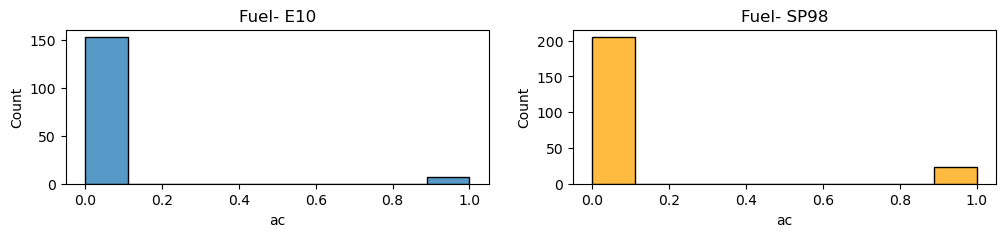

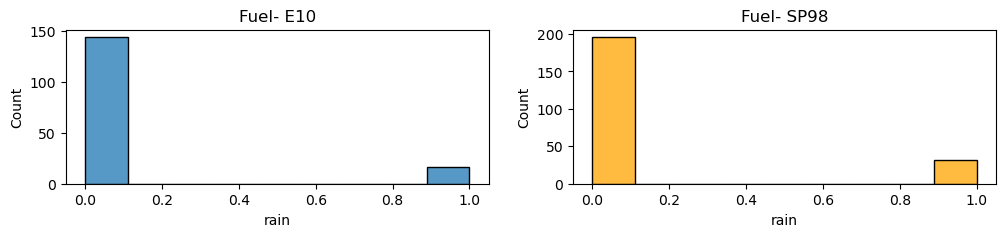

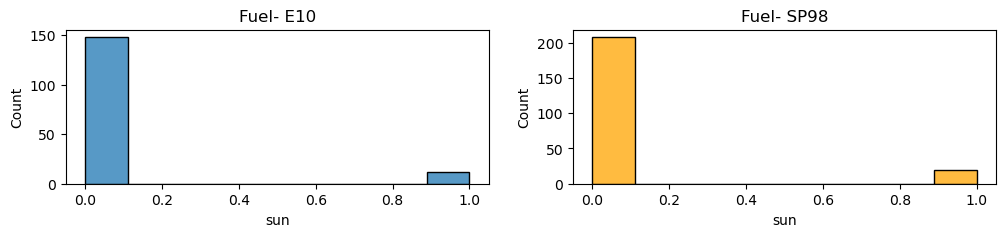

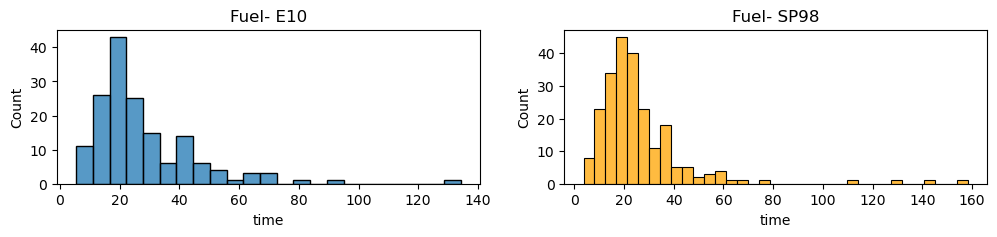

In [31]:
for col in e10.columns:
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12, 2))
    sns.histplot(x=col,data=e10,ax=ax1)
    ax1.set_title('Fuel- E10')
    
    sns.histplot(x=col,data=sp98,ax=ax2,color='orange')
    ax2.set_title('Fuel- SP98')
    plt.show()

#### Conclusions from above plots:
- Longer drives were taken with SP98 fuel. Also more distance travelled with SP98.
- Consumption was also more for SP98 fuel.
- Outside temperature was a little cooler while driving with E10.
- AC was turned on more while using SP98 fuel.